In [35]:
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 os.makedirs(housing_path, exist_ok=True)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()


In [36]:
 fetch_housing_data()

In [37]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "pm.csv")
 return pd.read_csv(csv_path)


In [38]:
df=load_housing_data()

In [39]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [40]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [42]:
df.drop(['Type'],axis=1,inplace=True)

In [43]:
corr=df.corr()

In [44]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


<Axes: >

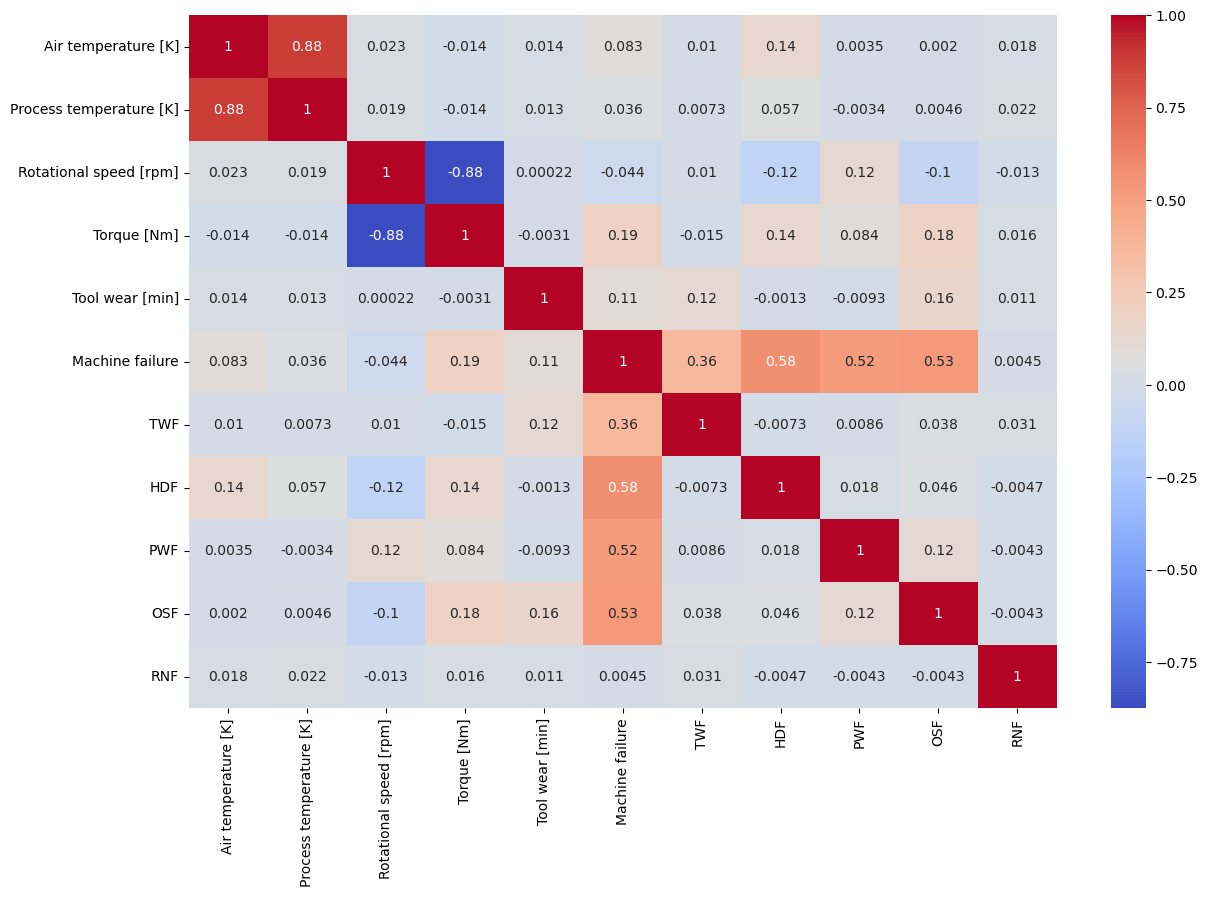

In [45]:
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [46]:
df=df[df.columns[:6]]

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 468.9 KB
None


In [48]:
df.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')

In [49]:
df.dtypes

Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
dtype: object

In [50]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [51]:
for feature in df.columns:
    print(feature + " - " + str(len(df[df[feature].isna()])))

Air temperature [K] - 0
Process temperature [K] - 0
Rotational speed [rpm] - 0
Torque [Nm] - 0
Tool wear [min] - 0
Machine failure - 0


In [52]:
df_group = df.groupby(['Machine failure'])
df_group.count()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Machine failure,,,,,
0,9661,9661,9661,9661,9661
1,339,339,339,339,339


In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [28]:
#df[df['Machine failure'].isna()]
for i in df.columns:
    print(df[df[i].isna()])

Empty DataFrame
Columns: [Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure]
Index: []
Empty DataFrame
Columns: [Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure]
Index: []
Empty DataFrame
Columns: [Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure]
Index: []
Empty DataFrame
Columns: [Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure]
Index: []
Empty DataFrame
Columns: [Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure]
Index: []
Empty DataFrame
Columns: [Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure]
Index: []


In [30]:
df_cat = df[["Air temperature [K]"]]


In [31]:
df_cat.head(10)

,Air temperature [K]
0,298.1
1,298.2
2,298.1
3,298.2
4,298.2
5,298.1
6,298.1
7,298.1
8,298.3
9,298.5


# SVM with different hyperparameters

Q)Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyperparameters,
such as kernel="linear" (with various values for the C hyperparameter)
or kernel="rbf" (with various values for the C and gamma
hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?

In [63]:
df.iloc[:,[-1]]

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [65]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [66]:
X = df.iloc[:,:-1]
X = scale.fit_transform(X)
y=df.iloc[:,[-1]]

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

In [67]:
import numpy as np
#from sklearn.datasets import load_boston  # Example dataset
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
#data = load_boston()
#X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for SVR
param_grid_linear = {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]}
param_grid_rbf = {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}

# Perform Grid Search for linear kernel
grid_linear = GridSearchCV(SVR(), param_grid_linear, cv=5, scoring='r2')
grid_linear.fit(X_train, y_train)

# Perform Grid Search for rbf kernel
grid_rbf = GridSearchCV(SVR(), param_grid_rbf, cv=5, scoring='r2')
grid_rbf.fit(X_train, y_train)

# Evaluate the best models
best_linear_model = grid_linear.best_estimator_
best_rbf_model = grid_rbf.best_estimator_

y_pred_linear = best_linear_model.predict(X_test)
y_pred_rbf = best_rbf_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)

r2_linear = r2_score(y_test, y_pred_linear)
r2_rbf = r2_score(y_test, y_pred_rbf)

# Output results
print("Best Linear SVR Parameters:", grid_linear.best_params_)
print("Linear Kernel - MSE:", mse_linear, ", R² Score:", r2_linear)

print("Best RBF SVR Parameters:", grid_rbf.best_params_)
print("RBF Kernel - MSE:", mse_rbf, ", R² Score:", r2_rbf)


C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best Linear SVR Parameters: {'C': 100, 'kernel': 'linear'}
Linear Kernel - MSE: 0.03426310897100799 , R² Score: -0.15872163176922305
Best RBF SVR Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
RBF Kernel - MSE: 0.01968248401896937 , R² Score: 0.3343709696913444


In [68]:
results = pd.DataFrame( columns=['Model','MAE', 'MAPE',"RSME","r2_score",])
predictions = pd.DataFrame( columns=[])

In [70]:
pred_1=y_pred_rbf

In [73]:
results.loc[len(results.index)] = ['SVR', mean_absolute_error( y_test, pred_1), mean_absolute_percentage_error(y_test, pred_1),mean_squared_error( y_test, pred_1),r2_score( y_test, pred_1 )] 






In [74]:


# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()

# training all the model on the training dataset
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

results.loc[len(results.index)] = ['LinearRegression', mean_absolute_error( y_test, pred_1), mean_absolute_percentage_error(y_test, pred_1),mean_squared_error( y_test, pred_1),r2_score( y_test, pred_1 )] 
results.loc[len(results.index)] = ['XGBRegressor', mean_absolute_error( y_test, pred_2), mean_absolute_percentage_error(y_test, pred_2),mean_squared_error( y_test, pred_2),r2_score( y_test, pred_2)] 
results.loc[len(results.index)] = ['RandomForestRegressor', mean_absolute_error( y_test, pred_3), mean_absolute_percentage_error(y_test, pred_3),mean_squared_error( y_test, pred_3),r2_score( y_test, pred_3 )] 


C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [76]:
from sklearn.ensemble import AdaBoostRegressor

model_Ada = AdaBoostRegressor(random_state=0, n_estimators=100)
model_Ada.fit(X_train, y_train)
pred_Ada = model_Ada.predict(X_test)
predictions["AdaBoostRegressor"]=pred_Ada
results.loc[len(results.index)] = ['AdaBoostRegressor', mean_absolute_error( y_test, pred_Ada), mean_absolute_percentage_error(y_test, pred_Ada),mean_squared_error( y_test, pred_Ada),r2_score( y_test, pred_Ada )] 


C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
results

,Model,MAE,MAPE,RSME,r2_score
0,SVR,0.079665,2.782128e+14,0.019682,0.334371
1,LinearRegression,0.075143,2.235256e+14,0.025933,0.122984
2,XGBRegressor,0.032108,8.112190e+13,0.015383,0.479757
3,RandomForestRegressor,0.025485,6.185694e+13,0.012993,0.560610
4,AdaBoostRegressor,0.090409,3.344752e+14,0.029667,-0.003289


In [81]:
len(y_test)

2000